# **Business Problem Statement**

XYZ is a service-providing company that provides customers with a one-year subscription plan for their product. The company wants to know if the customers will renew the subscription for the coming year or not.

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import missingno as mno

%matplotlib inline

In [ ]:
# Importing ML algorithms
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# All floating values upto two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Read the data
data = pd.read_csv('Data/data_subscription.csv')
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.20,16.81,82,1,4.00,1,0.00
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.70,33.37,87,3,3.00,2,0.00
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.90,9.89,91,1,4.00,5,1.00
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.50,36.41,102,4,3.00,3,0.00
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.90,27.54,83,7,3.00,1,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

* Our dataset contains 2000 records each having 16 features. 
* There are missing values in some records.

**Descriptive stats**

In [ ]:
quants = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
data.describe(include = np.number, percentiles = quants).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
year,2000.00,2015.00,0.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00
customer_id,2000.00,554887.16,261033.69,100198.00,107959.45,186449.70,328634.75,567957.50,773280.25,911009.60,988979.79,999961.00
age,2000.00,38.69,10.21,18.00,21.00,27.00,32.00,37.00,44.00,52.00,70.00,82.00
no_of_days_subscribed,2000.00,99.75,39.76,1.00,11.99,49.00,73.00,99.00,127.00,151.00,195.00,243.00
weekly_mins_watched,2000.00,270.18,80.55,0.00,82.19,167.84,218.21,269.93,324.68,372.92,452.56,526.20
minimum_daily_mins,2000.00,10.20,2.79,0.00,3.70,6.60,8.40,10.20,12.00,13.70,16.50,20.00
maximum_daily_mins,2000.00,30.62,9.13,0.00,9.32,19.02,24.73,30.59,36.80,42.26,51.29,59.64
weekly_max_night_mins,2000.00,100.42,19.53,42.00,55.99,75.00,87.00,101.00,114.00,125.00,145.01,175.00
videos_watched,2000.00,4.48,2.49,0.00,1.00,2.00,3.00,4.00,6.00,8.00,13.00,19.00
maximum_days_inactive,1972.00,3.25,0.81,0.00,1.00,2.00,3.00,3.00,4.00,4.00,5.00,6.00


## Utility functions

In [ ]:
# Function to check for missing values
def missing_check(df):
  '''
  Computes the statistics for missing values
  Args:
      df: A pandas dataframe
  
  Returns:
      missing: A dataframe of missing value stats    
  '''
  n_obs = df.shape[0]
  df = df.isna().sum().sort_values(ascending = False)
  missing = pd.DataFrame()
  missing['Feature'] = df.index
  missing['Count of missing_values'] = df.to_numpy()
  missing['Percentage of Total'] = df.to_numpy()/n_obs*100
  return missing

# Function to check for duplicate values
def duplicates_check(df, remove_duplicates = False):
  '''
  checks for duplicate records in a dataframe
  Args:
      df: A pandas dataframe
      remove_duplicates: if set to true then remove the duplicate records
  
  Returns:
      if remove_duplicates = True, returns a dataframe with duplicate records removed      
  '''
  if df.duplicated().sum() != 0:
      df = df[df.duplicated(keep = 'first')]
      print("Following records are duplicated in the dataset:\n")
      display(df)
      if remove_duplicates:
        df = df.drop_duplicates(keep = 'first')
        return df
  else:
    print("No duplicated records found in the dataset")


# Function to plot ditribution of continuous variables for EDA
def cont_distplot(df, col, hue_ = None):
  '''
  Plot histogram and boxplot for continuous variables
  Args:
      df: A pandas dataframe
      col: continuous feature to plot
      hue_(str): another feature usually the target
  '''
  df = df[df[col].notnull()]
  if hue_ is None:
    fig, [ax1,ax2] = plt.subplots(2, figsize = (10,8), sharex = True)
    sns.boxplot(data = df, x = col, ax = ax1)
    ax1.set_xlabel("")
    sns.histplot(data = df, x = col, stat = 'frequency', kde = True, ax = ax2)
    ax2.axvline(np.mean(df[col]), color = 'r', linestyle = '--')
    print("skewness : ",skew(df[col]))
    print("kurtosis : ",kurtosis(df[col]))
  else:
    fig, [ax1,ax2] = plt.subplots(1,2, figsize = (16,6))
    sns.histplot(data = df, x = col, stat = 'density', kde = True, hue = hue_, ax = ax1)
    ax1.axvline(np.mean(df[df[hue_] == 1.0][col]), color = 'r', linestyle = '--', label = "Mean (1)")
    ax1.axvline(np.mean(df[df[hue_] == 0.0][col]), color = 'g', linestyle = '--',label = "Mean (0)")
    sns.boxplot(data = df, x = hue_, y = col, ax = ax2)
  plt.show()



In [ ]:
# Binary classifier
def binary_clf(model, clf, X, y, Xval, params = None, score = None):
    """Train a binaryclassifier.
      Args:
          model_name (str): The model name identifier
          clf: The binary classifier object
          X: training data
          y: truth labels
          Xval: validataion dataset  
          params (dict): Grid Search parameters

      Returns:
          Classifier object
          dataframe of model predictions and scores
      """
    if params is None:
        clf.fit(X, y)
        y_pred = clf.predict(Xval)
        if hasattr(clf, 'predict_proba'):   
            y_score = clf.predict_proba(Xval)[:,1]
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(Xval)
        else:
            y_score = y_pred

        df_predictions = pd.DataFrame({'y_pred': y_pred, 'y_score': y_score})
        return clf, df_predictions

    else:
        print("Performing hyperparameter tuning on the model - %s" %(model))
        grid_search = GridSearchCV(estimator = clf, param_grid = params, scoring = score, n_jobs = -1)
        grid_search.fit(X,y)
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(Xval)
        
        if hasattr(grid_search, 'predict_proba'):   
            y_score = grid_search.predict_proba(Xval)[:,1]
        elif hasattr(grid_search, 'decision_function'):
            y_score = grid_search.decision_function(Xval)
        else:
            y_score = y_pred
            
        predictions = {'y_pred' : y_pred, 'y_score' : y_score}
        df_predictions = pd.DataFrame.from_dict(predictions)
        print("Tuning complete !!")
        return grid_search.best_estimator_, df_predictions

# Metrics for binary classfier
def binary_classification_metrics(model, y_val, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculates main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """
      
    binclass_metrics = {
                        'Accuracy' : accuracy_score(y_val, y_pred),
                        'Precision' : precision_score(y_val, y_pred),
                        'Recall' : recall_score(y_val, y_pred),
                        'F1 Score' : f1_score(y_val, y_pred),
                        'ROC AUC' : roc_auc_score(y_val, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  


    fpr, tpr, thresh_roc = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr
                  }                 
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    
    # confusion matrix
    cnf_matrix = confusion_matrix(y_val, y_pred)
    actual_pos = cnf_matrix[1,0] + cnf_matrix[1,1]
    actual_neg = cnf_matrix[0,0] + cnf_matrix[0,1]
    
    df_roc_thresh['TP'] = (actual_pos*df_roc_thresh['TPR']).astype(int)
    df_roc_thresh['FP'] = (actual_pos - (actual_pos*df_roc_thresh['TPR'])).astype(int)
    df_roc_thresh['TN'] = (actual_neg*(1 - df_roc_thresh['FPR'])).astype(int)
    df_roc_thresh['FN'] = (actual_neg - (actual_neg*(1 - df_roc_thresh['FPR']))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    

    precision, recall, thresh_prc = precision_recall_curve(y_val, y_score)

    thresh_prc = np.append(thresh_prc,1)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:', cnf_matrix)
        print('\nClassification Report:')
        print(classification_report(y_val, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR')  
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall')  
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh


## **Check for missing values and duplicate records**

In [ ]:
missing_check(data)  

,Feature,Count of missing_values,Percentage of Total
0,churn,35,2.19
1,maximum_days_inactive,28,1.75
2,gender,24,1.50
3,year,0,0.00
4,customer_id,0,0.00
5,phone_no,0,0.00
6,age,0,0.00
7,no_of_days_subscribed,0,0.00
8,multi_screen,0,0.00
9,mail_subscribed,0,0.00


* Features with missing values - gender, maximum_days_inactive, churn
* Target Feature 'Churn' has highest missing values among all features.


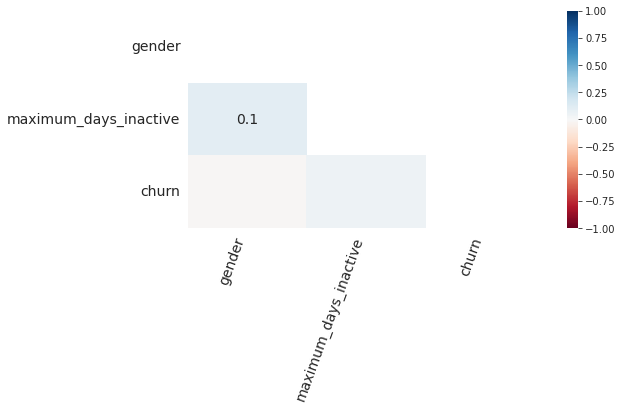

In [ ]:
mno.heatmap(data, figsize = (8,4))
plt.xticks(fontsize = 14, rotation = 70)
plt.yticks(fontsize = 14)
plt.show();

In [ ]:
duplicates_check(data)

No duplicated records found in the dataset


## **Univariate EDA**

In [ ]:
sns.set_style('darkgrid')

**churn**

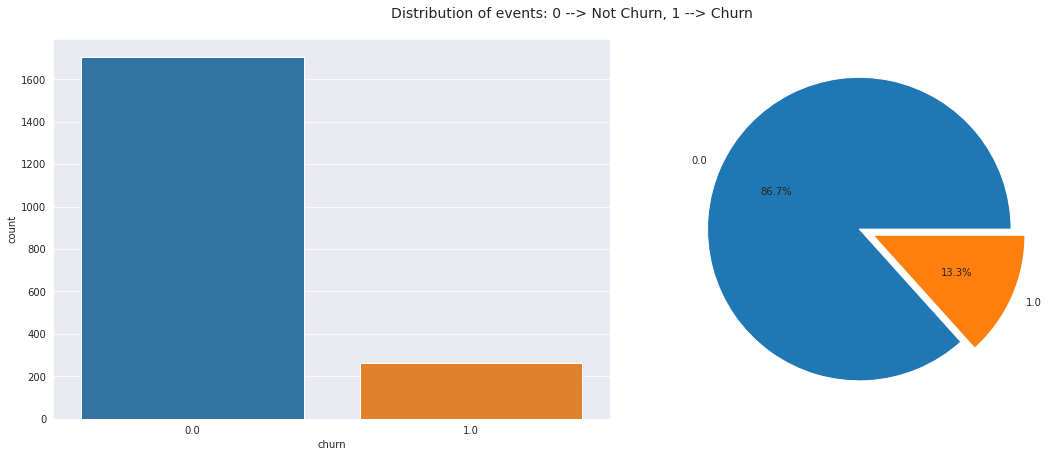

In [ ]:
# Distribution of target feature
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x = 'churn', data = data)

plt.subplot(1,2,2)
event = data['churn'].value_counts()
event_labels = data['churn'].value_counts().index
palette = sns.color_palette()
plt.pie(event, labels = event_labels, autopct = '%.1f%%', colors = palette, explode = [0, 0.1])

# GLobal title and its positioning
fig = plt.gcf()
st = fig.suptitle('Distribution of events: 0 --> Not Churn, 1 --> Churn', fontsize = 14)
st.set_y(1.05)

plt.tight_layout()
plt.show();

* Imbalanced classes : Event rate for Churn (1) is much higher than that for Not Churn (0)

**year**

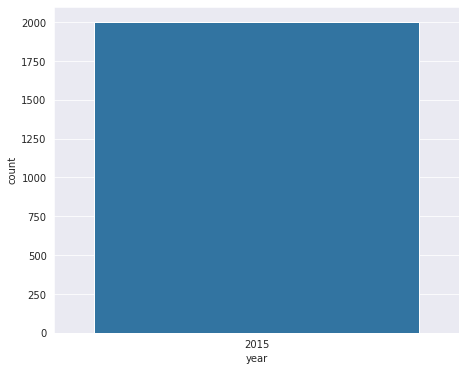

In [ ]:
# Distribution of Year
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x = 'year', data = data)

plt.show();

* All the customer data pertains to the year 2015.
* This feature has zero variance therefore unlikely to be a predictor of churn rate.

**gender**

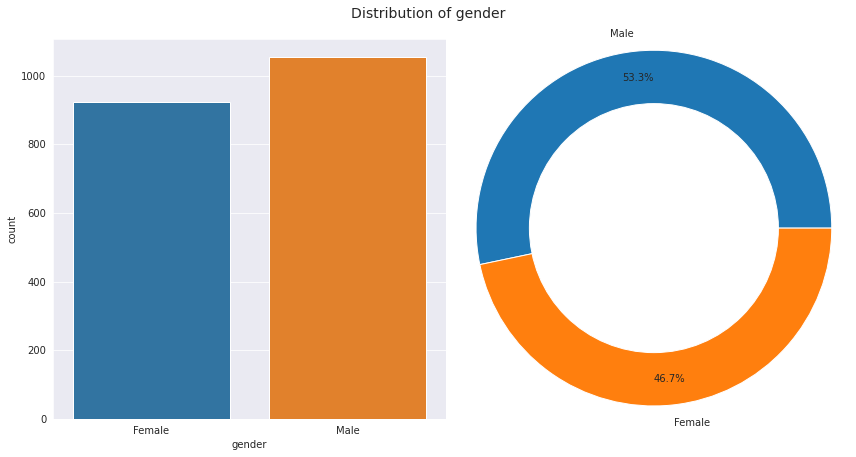

In [ ]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize = (12,6))

sns.countplot(x = 'gender', data = data, ax = ax1)

event = data['gender'].value_counts()
event_labels = data['gender'].value_counts().index
palette = sns.color_palette()
ax2.pie(event, labels = event_labels, autopct = '%.1f%%', colors = palette, pctdistance = 0.85)#, explode = [0, 0.1])
ax2.axis('equal')

#draw circle for doughnut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# GLobal title and its positioning
st = fig.suptitle('Distribution of gender', fontsize = 14)
st.set_y(1.05)

plt.tight_layout()
plt.show();

* Dataset contains slightly higher no. of records for males than that for females.

**Age**

skewness :  0.9575050948827951
kurtosis :  1.2028297496960212


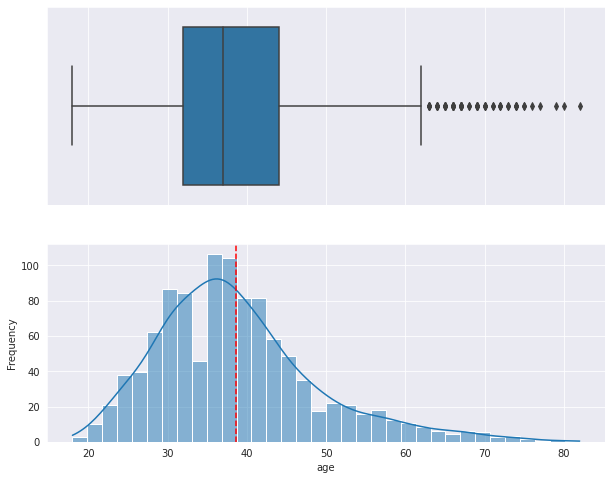

In [ ]:
cont_distplot(data, 'age') 

* Slightly right skewed distribution.
* Median age of subscribers is 37.
* There are a few subscribers having age of 60 years or above.

**no_of_days_subscribed**

skewness :  0.1489789554214124
kurtosis :  -0.06946630338174975


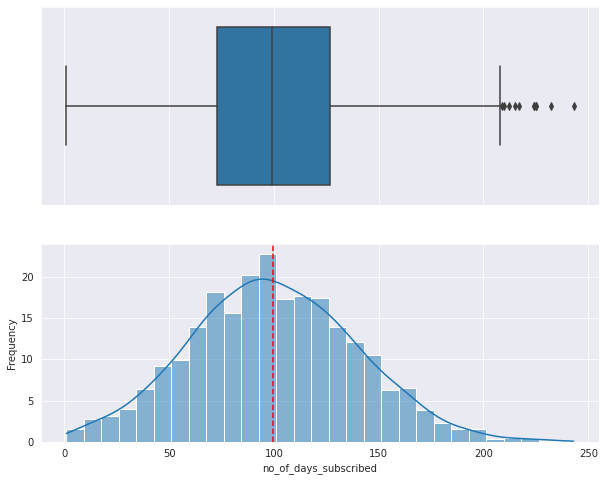

In [ ]:
cont_distplot(data, 'no_of_days_subscribed') 

* Approximately Normal distribution
* Boxplot shows presence of outliers however the kde plot indicates otherwise. This may be due to multiplication factor of $1.5$ in IQR calculation which equates to a $Z-score$ of $2.7\sigma$ for Normal distribution.
Therefore boxplot covers approximately $99.31\%$ of the population and the IQR i.e. $50\%$ of data lies between $-0.6745\sigma$ and $0.6745\sigma$ in Normal distribution.  

* Proof
>Lower Bound:

$= Q1 - 1.5 * IQR$

$= Q1 - 1.5 * (Q3 - Q1)$

$= -0.675σ - 1.5 * (0.675 - [-0.675])σ$

$= -0.675σ - 1.5 * 1.35σ$

$= -2.7σ$


>Upper Bound:

$= Q3 + 1.5 * IQR$

$= Q3 + 1.5 * (Q3 - Q1)$

$= 0.675σ + 1.5 * (0.675 - [-0.675])σ$

$= 0.675σ + 1.5 * 1.35σ$

$= 2.7σ$

Let us investigate this

skewness :  0.13061946867664062
kurtosis :  -0.22339622803738735


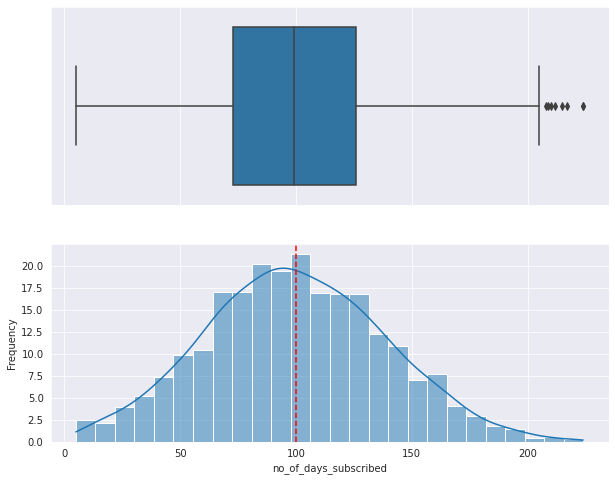

In [ ]:
# Between the two quantiles [0.00135, 0.99865], 99.73% of the data lies within 6 std in normal distributions(z = -3 to +3)
# Between the two quantiles [0.003467, 0.99653], 99.31% of the data lies in normal distributions(z = -2.7 to +2.7)
uq = data['no_of_days_subscribed'].quantile(q = 0.99865)
lq = data['no_of_days_subscribed'].quantile(q = 0.003467)

df2 = data[(data['no_of_days_subscribed'] > lq) & (data['no_of_days_subscribed'] < uq)]

cont_distplot(df2, 'no_of_days_subscribed')

**weekly_mins_watched**

skewness :  -0.0670610543556763
kurtosis :  0.05199096302728545


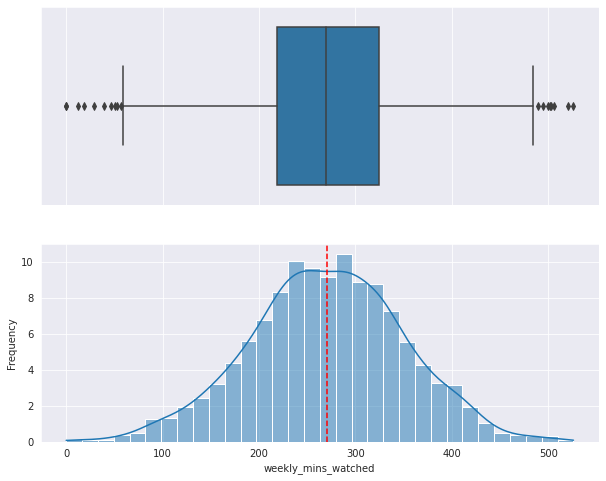

In [ ]:
cont_distplot(data, 'weekly_mins_watched')

* Normal distribution

**minimum_daily_mins**

skewness :  -0.16198977917946283
kurtosis :  0.5110638260425358


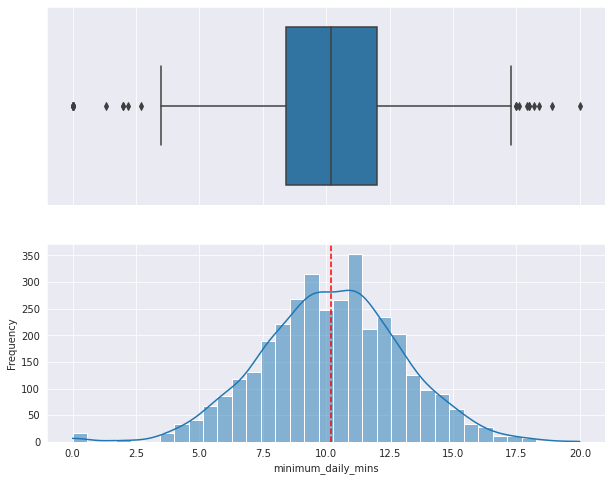

In [ ]:
cont_distplot(data, 'minimum_daily_mins')

**maximum_daily_mins**

skewness :  -0.06705362550847803
kurtosis :  0.05210349554308058


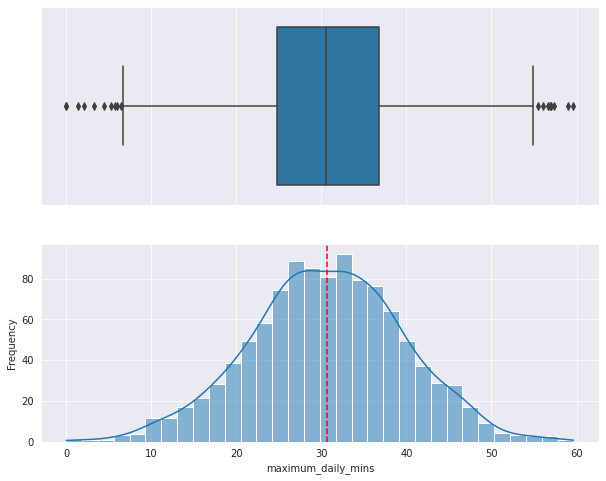

In [ ]:
cont_distplot(data, 'maximum_daily_mins')

**weekly_max_night_mins**

skewness :  -5.832046769528535e-05
kurtosis :  -0.14102316005431703


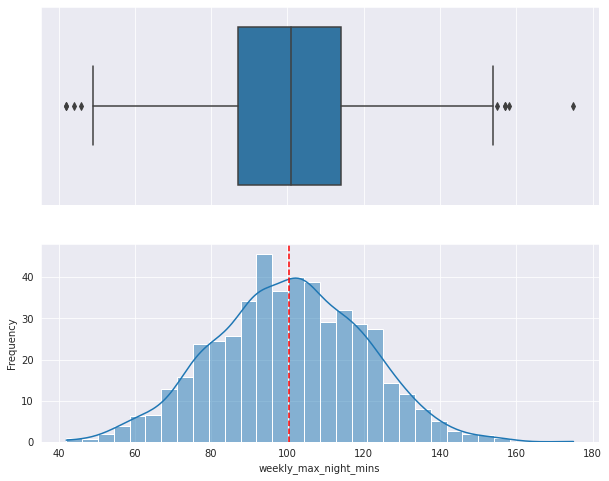

In [ ]:
cont_distplot(data, 'weekly_max_night_mins')

**videos_watched**

skewness :  1.3082267673490586
kurtosis :  2.8491259999916965


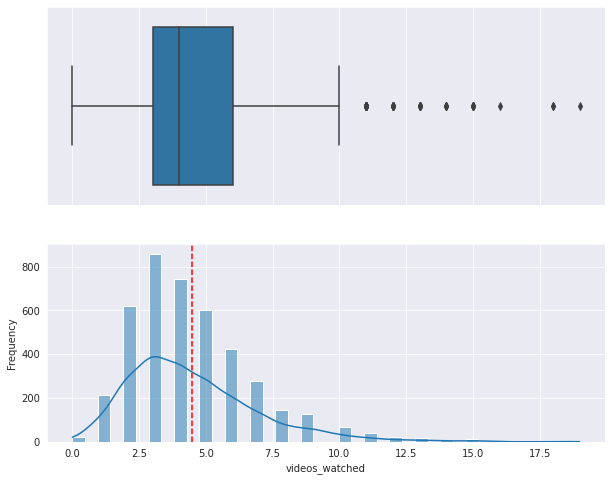

In [ ]:
cont_distplot(data, 'videos_watched')

* Right skewed distribution.
* Only a few customers have watched more than 10 videos.

**maximum_days_inactive**

skewness :  -0.24974754600122637
kurtosis :  0.8019909810541641


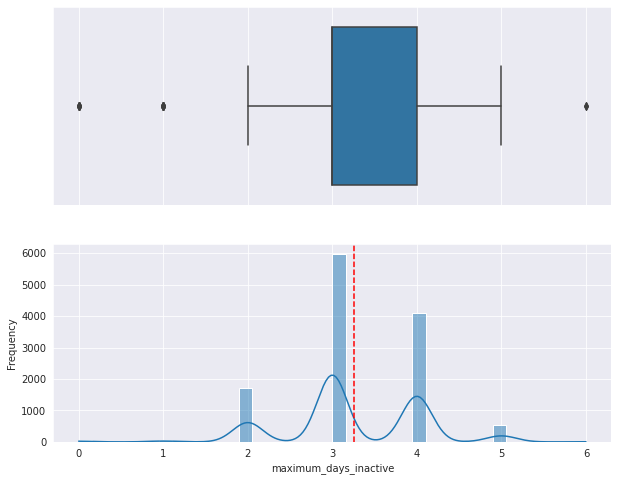

In [ ]:
cont_distplot(data, 'maximum_days_inactive')

* Multimodal distribution

**customer_support_calls**

skewness :  1.1272777183462885
kurtosis :  1.8409891725156955


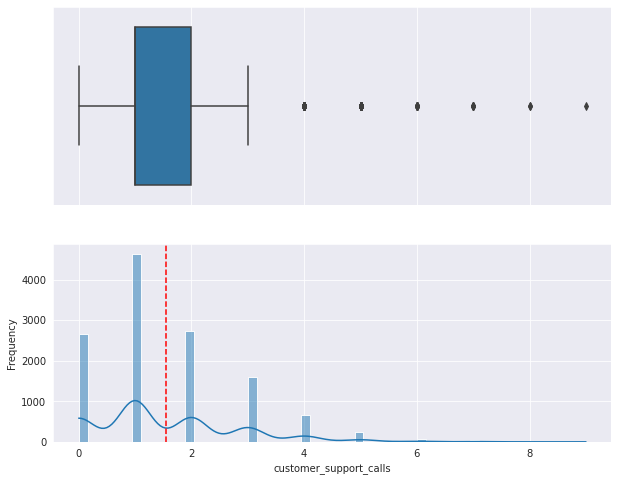

In [ ]:
cont_distplot(data, 'customer_support_calls')

## **Multivariate EDA**

**Gender vs Churn**

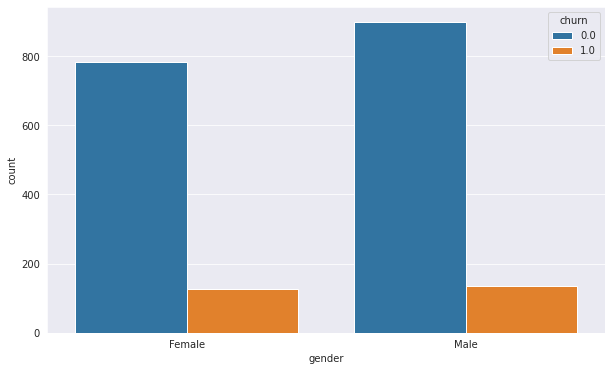

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', data = data, hue = 'churn')
plt.show();

* Churn rate for both males and females are similar.
* No correlation between gender and churn rate.

**multi_screen vs Churn**

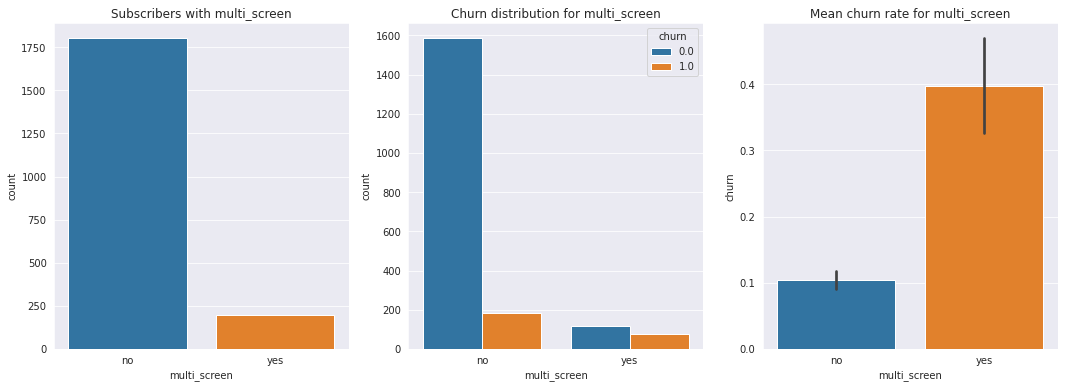

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize = (18,6))

sns.countplot(data = data, x = 'multi_screen', ax = ax1)
ax1.set_title("Subscribers with multi_screen")
sns.countplot(data = data, x = 'multi_screen', ax = ax2, hue = 'churn')
ax2.set_title('Churn distribution for multi_screen')
sns.barplot(data = data, x = 'multi_screen', y = 'churn', ax = ax3)
ax3.set_title("Mean churn rate for multi_screen")
plt.show();

* Majority of subscribers have access to multi_screen.
* Mean Churn rate for subscribers with access to multi_screen is significantly higher.

**mail_subscribed vs Churn**

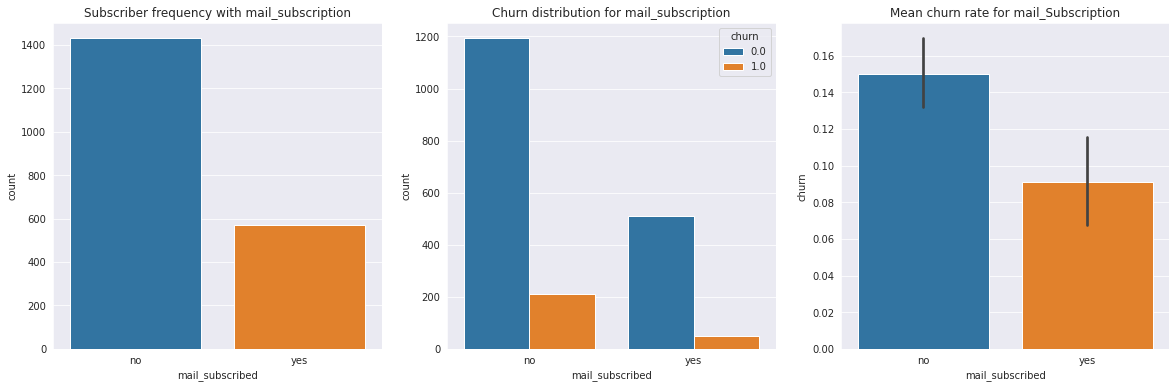

In [ ]:
fig, [ax1,ax2, ax3] = plt.subplots(1,3, figsize = (20,6))

sns.countplot(data = data, x = 'mail_subscribed', ax = ax1)
ax1.set_title("Subscriber frequency with mail_subscription")
sns.countplot(data = data, x = 'mail_subscribed', ax = ax2, hue = 'churn')
ax2.set_title("Churn distribution for mail_subscription")
sns.barplot(data = data, x = 'mail_subscribed', y = 'churn', ax = ax3)
ax3.set_title("Mean churn rate for mail_Subscription")
plt.show();

* Majority of subscribers have not opted for mail_subscription.
* Mean churn rate of subscribers with no mail subscription is higher.

**Age vs churn**

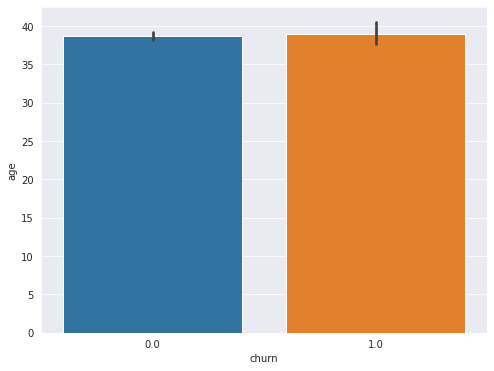

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'churn', y = 'age', data = data)
plt.show();

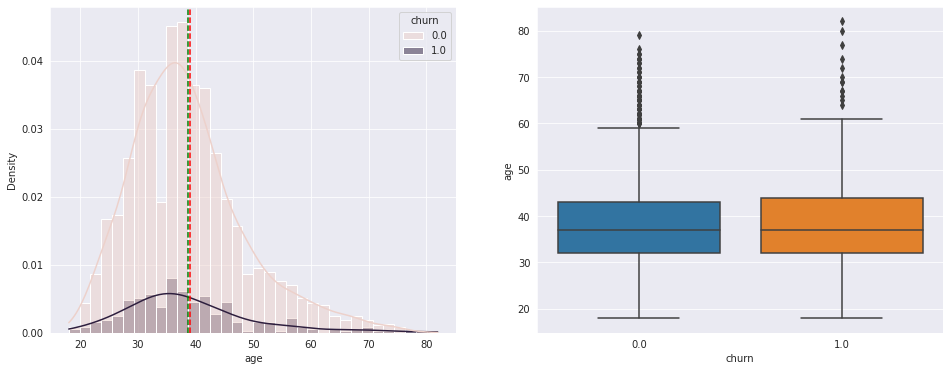

In [ ]:
cont_distplot(data, 'age', hue_ = 'churn') 

**no_of_days_subscribed vs Churn**

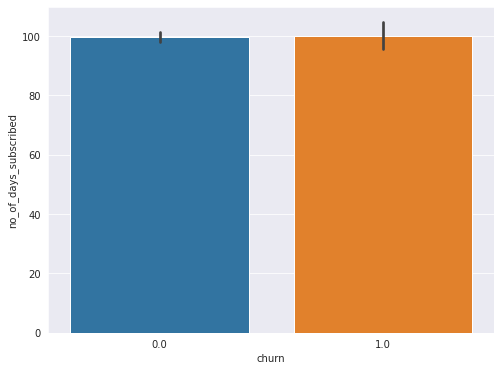

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'churn', y = 'no_of_days_subscribed', data = data)
plt.show();

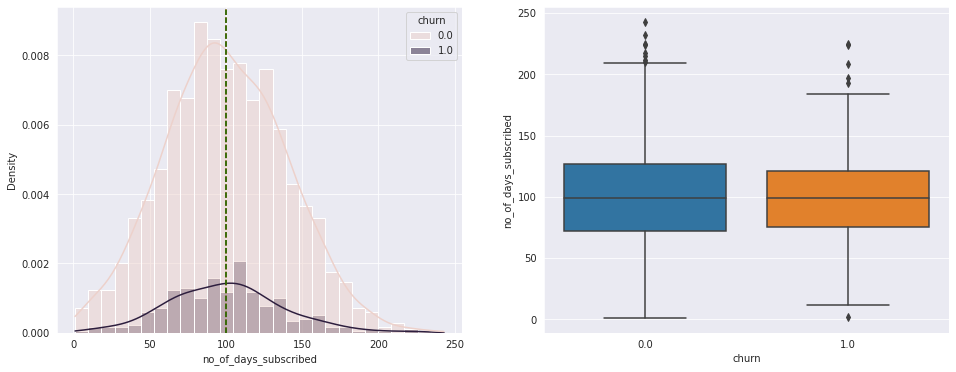

In [ ]:
cont_distplot(data, 'no_of_days_subscribed', hue_ = 'churn') 

* Distribution of event rates for both churn and not churn are similar.
* Mean for both the events are same, i.e., $100$
* Median for both the events are same, i.e., $100$ 


**weekly_mins_watched vs Churn**

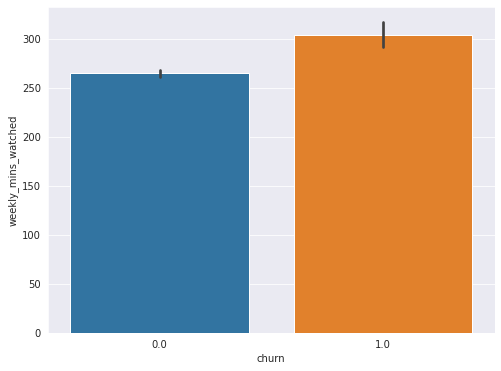

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'weekly_mins_watched')
plt.show();

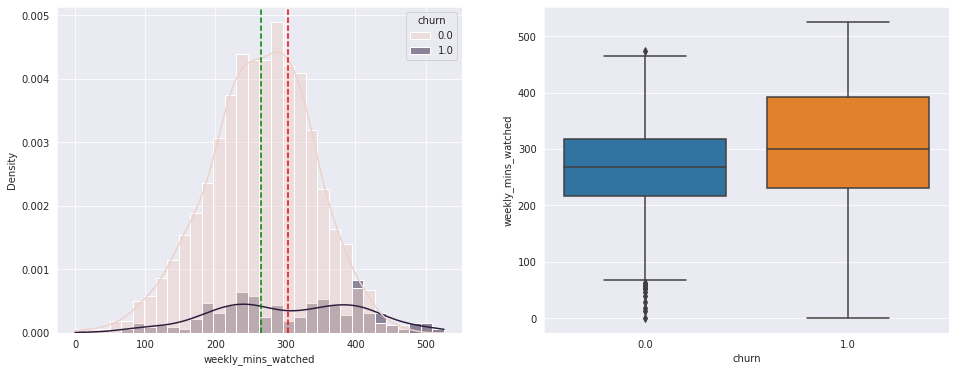

In [ ]:
cont_distplot(data, 'weekly_mins_watched', hue_ = 'churn')

**minimum_daily_mins vs churn**

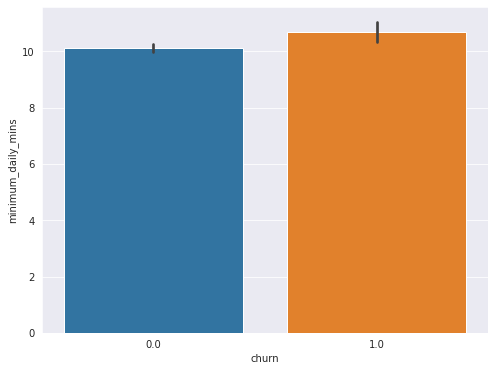

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'minimum_daily_mins')
plt.show();

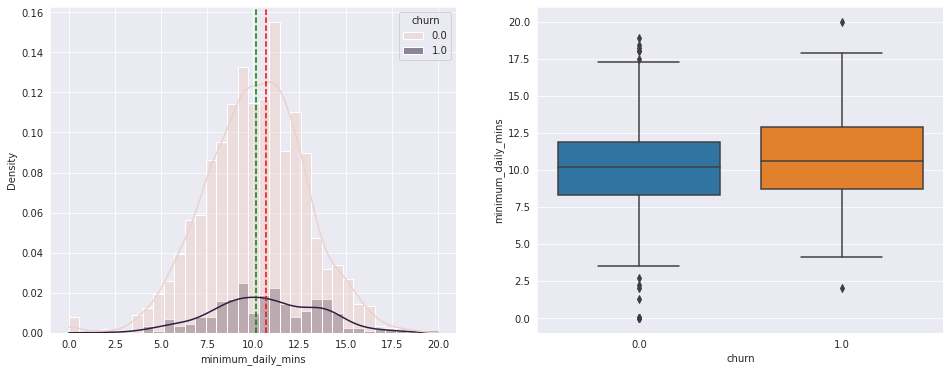

In [ ]:
cont_distplot(data, 'minimum_daily_mins', hue_ = 'churn')

**maximum_daily_mins vs churn**

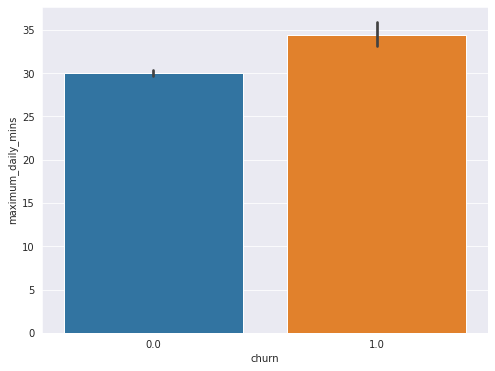

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'maximum_daily_mins')
plt.show();

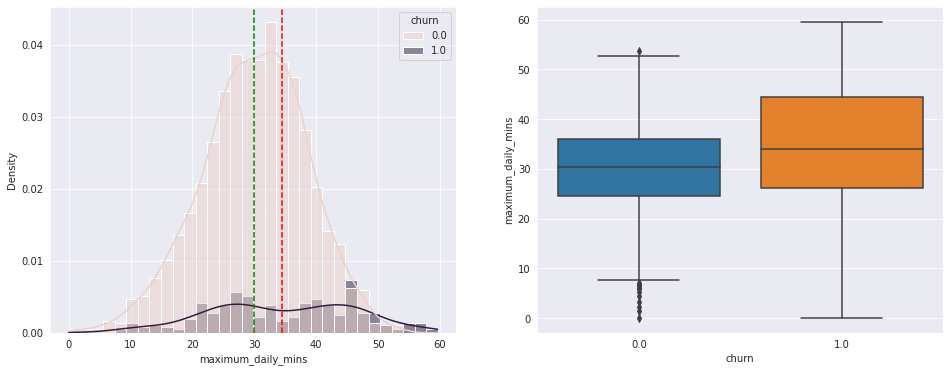

In [ ]:
cont_distplot(data, 'maximum_daily_mins', hue_ = 'churn')

**weekly_max_night_mins vs churn**

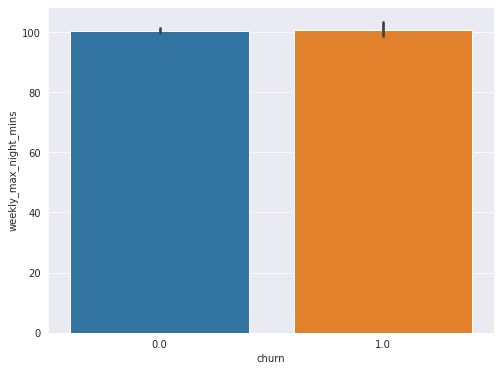

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'weekly_max_night_mins')
plt.show();

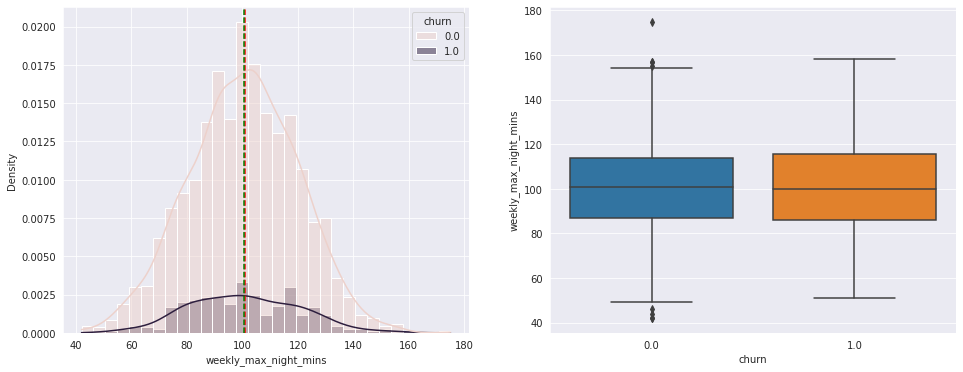

In [ ]:

cont_distplot(data, 'weekly_max_night_mins', hue_ = 'churn')

**videos_watched vs churn**

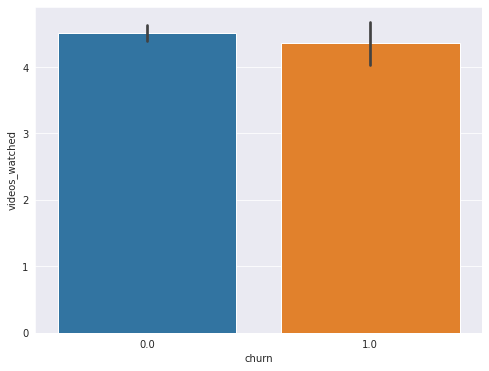

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'videos_watched')
plt.show();

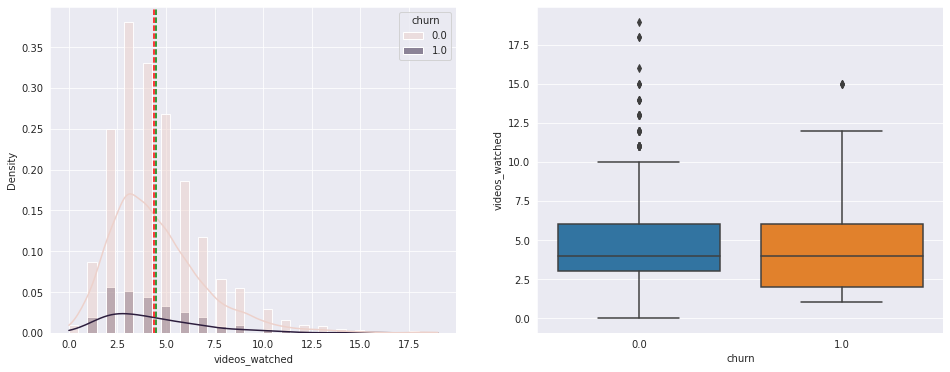

In [ ]:
cont_distplot(data, 'videos_watched', hue_ = 'churn')

* Right skewed distribution
* Majority of outliers belong to class 0 (not churn)

**maximum_days_inactive vs churn**

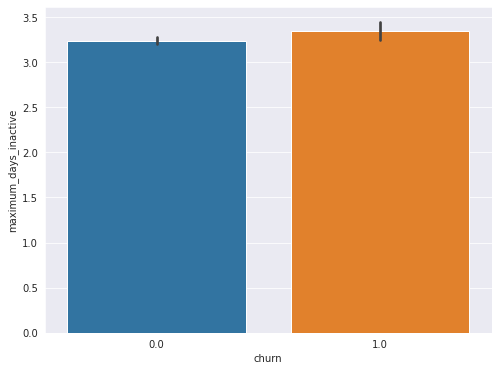

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'maximum_days_inactive')
plt.show();

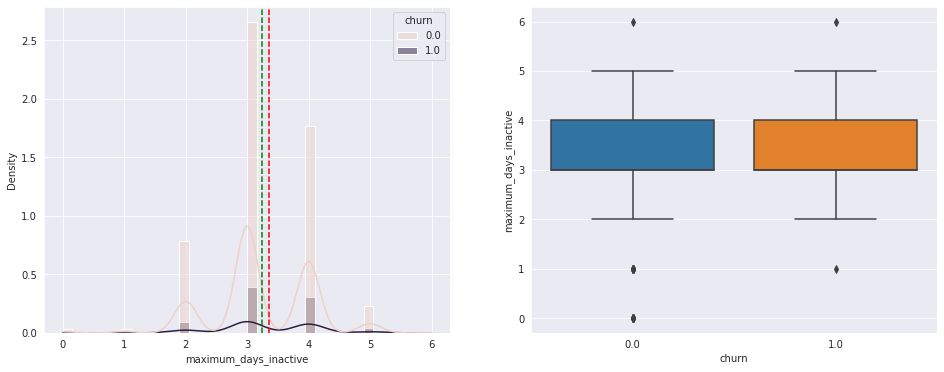

In [ ]:
cont_distplot(data, 'maximum_days_inactive', hue_ = 'churn')

**customer_support_calls vs churn**

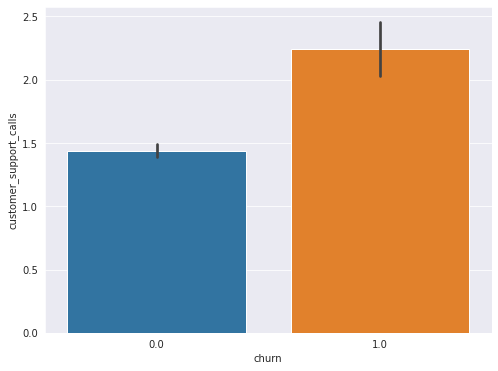

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'churn', y = 'customer_support_calls')
plt.show();

* Average number of calls for non churn is much lower than average no. of calls in case of churn.

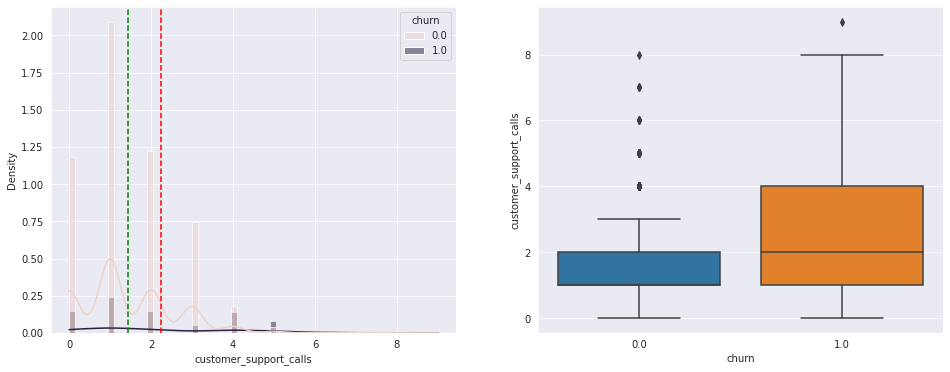

In [ ]:
cont_distplot(data, 'customer_support_calls', hue_ = 'churn')

* People who tend to make more no of custome support are more likely to churn.
* Median no of calls for case of churn is close to third quartile of non churn cases.
* For case of non churn, there are some outliers which might indicate that they were happy with the customer support provided.
* customer_calls_support is likely to be a good predictor of churn rate.

**Correlation matrix**

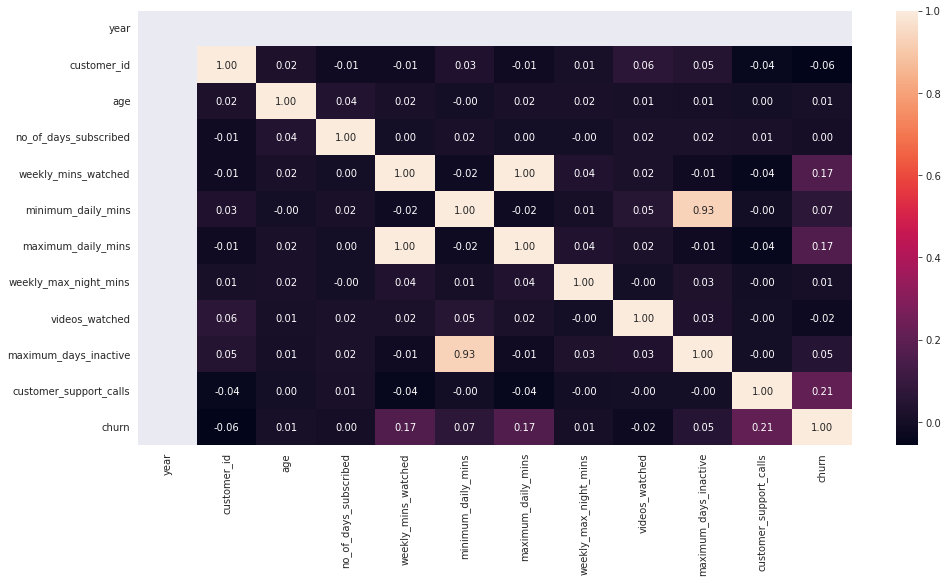

In [ ]:
corr = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show();

* Year has zero variance.
* maximum_daily_mins and weekly_mins_watched are perfectly linearly correlated.
* minimum_daily_mins and maximum_days_inactive have a strong linear correlation.

**maximum_daily_mins vs. weekly_mins_watched**

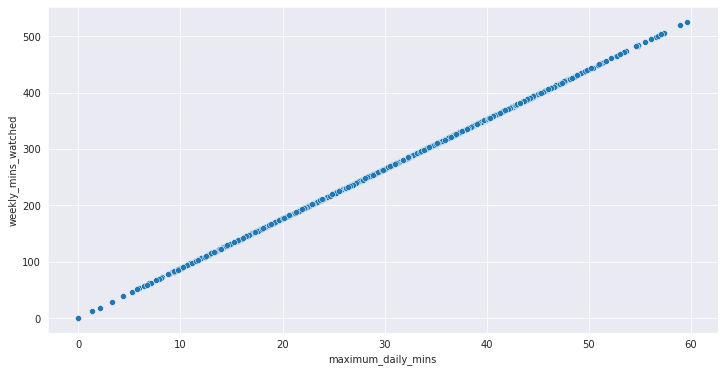

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = 'maximum_daily_mins', y = 'weekly_mins_watched')
plt.show();

* We can see a perfect linear correlation between maximum_daily_mins and weekly_mins_watched which is quite intuitive

**minimum_daily_mins vs. maximum_days_inactive**

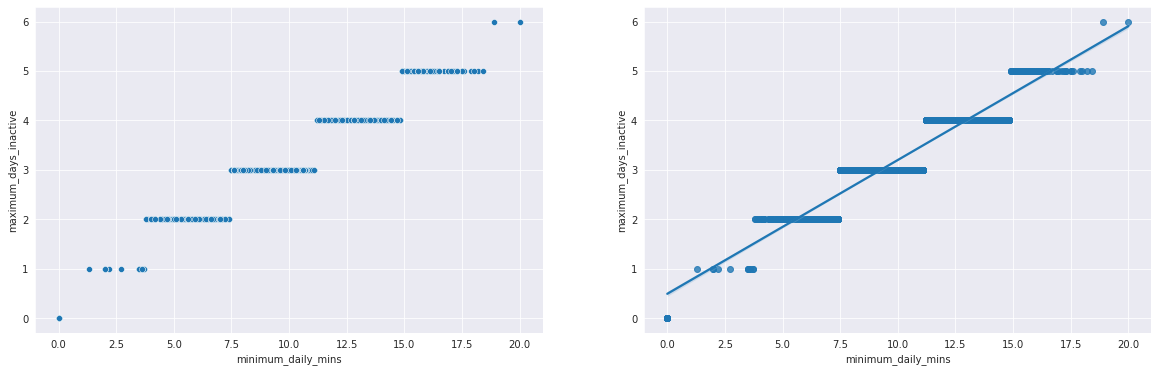

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.scatterplot(data = data, x = 'minimum_daily_mins', y = 'maximum_days_inactive')

plt.subplot(1,2,2)
sns.regplot(data = data, x = 'minimum_daily_mins', y = 'maximum_days_inactive')

plt.show();

### We will put the records having missing values for 'Churn' feature into the test set.

In [ ]:
# put the records with missing values for 'churn' feature into the test set
test_df = data[data['churn'].isna()].reset_index().drop(columns = ['index', 'churn'], axis = 1)
test_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,2015,129137,335-7257,Female,36,92,no,yes,276.00,12.70,31.28,96,3,NaN,2
1,2015,129487,377-9178,Female,39,103,no,no,240.30,9.70,27.23,97,2,NaN,0
2,2015,148624,410-5713,Male,32,66,no,yes,262.05,8.90,29.70,98,2,3.00,1
3,2015,148676,370-7546,Male,37,87,no,no,235.20,7.60,26.66,77,6,3.00,1
4,2015,165361,380-8727,Female,37,99,no,no,173.25,11.50,19.64,98,7,4.00,7


In [ ]:
# New data with no missing values for 'churn' feature
data_new = data[~(data['churn'].isna())]

In [ ]:
missing_check(data_new)

,Feature,Count of missing_values,Percentage of Total
0,maximum_days_inactive,26,1.62
1,gender,24,1.50
2,year,0,0.00
3,customer_id,0,0.00
4,phone_no,0,0.00
5,age,0,0.00
6,no_of_days_subscribed,0,0.00
7,multi_screen,0,0.00
8,mail_subscribed,0,0.00
9,weekly_mins_watched,0,0.00


In [ ]:
data_new.shape

(1965, 16)

### **Train test split**

In [ ]:
df_train, df_val = train_test_split(data_new, test_size = 0.15, stratify = data_new['churn'])

In [ ]:
df_train.shape, df_val.shape

((1670, 16), (295, 16))

In [ ]:
print("Distribution of even rates in training set")
df_train['churn'].value_counts()/len(df_train)
print("\n\nDistribution of even rates in validation set")
df_val['churn'].value_counts()/len(df_val)

Distribution of even rates in training set


0.00   0.87
1.00   0.13
Name: churn, dtype: float64



Distribution of even rates in validation set


0.00   0.87
1.00   0.13
Name: churn, dtype: float64

## **Feature Engineering**

### **Missing values imputation**

In [ ]:
missing_check(df_train)

,Feature,Count of missing_values,Percentage of Total
0,maximum_days_inactive,23,1.44
1,gender,20,1.25
2,year,0,0.00
3,customer_id,0,0.00
4,phone_no,0,0.00
5,age,0,0.00
6,no_of_days_subscribed,0,0.00
7,multi_screen,0,0.00
8,mail_subscribed,0,0.00
9,weekly_mins_watched,0,0.00


In [ ]:
missing_check(df_val)

,Feature,Count of missing_values,Percentage of Total
0,gender,4,0.25
1,maximum_days_inactive,3,0.19
2,year,0,0.00
3,customer_id,0,0.00
4,phone_no,0,0.00
5,age,0,0.00
6,no_of_days_subscribed,0,0.00
7,multi_screen,0,0.00
8,mail_subscribed,0,0.00
9,weekly_mins_watched,0,0.00


* Since maximum_days_inactive has a strong linear correlation with minimum_daily_mins, we will take advantage of this information to impute the missing values in maximum_days_inactive.
* We will use Iterative imputer class of scikit-learn with Linear Regression as the estimator to achieve our goal.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

lr = LinearRegression()

imp = IterativeImputer(estimator = lr, max_iter = 5, random_state = 101, tol = 1e-5, verbose = 2, imputation_order = 'roman')

In [ ]:
imp.fit(df_train[['minimum_daily_mins', 'maximum_days_inactive']])
df_train[['minimum_daily_mins', 'maximum_days_inactive']] = imp.transform(df_train[['minimum_daily_mins', 'maximum_days_inactive']])
df_val[['minimum_daily_mins', 'maximum_days_inactive']] = imp.transform(df_val[['minimum_daily_mins', 'maximum_days_inactive']])

[IterativeImputer] Completing matrix with shape (1670, 2)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.00
[IterativeImputer] Change: 2.1077995372567893, scaled tolerance: 0.0002 
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.01
[IterativeImputer] Change: 0.0, scaled tolerance: 0.0002 
[IterativeImputer] Early stopping criterion reached.


IterativeImputer(estimator=LinearRegression(), imputation_order='roman',
                 max_iter=5, random_state=101, tol=1e-05, verbose=2)

[IterativeImputer] Completing matrix with shape (1670, 2)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (295, 2)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00


In [ ]:
df_train['gender'] = df_train['gender'].fillna(df_train['gender'].mode().loc[0])
df_val['gender'] = df_val['gender'].fillna(df_train['gender'].mode().loc[0])

### **Label Encoding of nominal features**

In [ ]:
df_train.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [ ]:
df_train['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# gender 
df_train['gender'] = df_train['gender'].map({'Female':0, 'Male':1})
df_val['gender'] = df_val['gender'].map({'Female':0, 'Male':1})

In [ ]:
# mulit_screen
df_train['multi_screen'] = df_train['multi_screen'].map({'no':0, 'yes':1})
df_val['multi_screen'] = df_val['multi_screen'].map({'no':0, 'yes':1})

In [ ]:
# mail_subscribed
df_train['mail_subscribed'] = df_train['mail_subscribed'].map({'no':0, 'yes':1})
df_val['mail_subscribed'] = df_val['mail_subscribed'].map({'no':0, 'yes':1})

**Dropping irrelevant columns**

 **year** - zero variance, unlikely a good predictor
 
 **customer_id** - unique identifier
 
 **phone_no** - unique for every customer

 **maximum_days_inactive** - strong correlation with minimum_daily_mins and also contains missing values

 **maximum_daily_mins** - perfect linear correlation with weekly_mins_watched

* We are dropping maximum_days_inactive and maximum_daily_mins to avoid the problem of multicollinearity which will reduce the model explainability.


In [ ]:
cols_to_drop = ['year', 'customer_id', 'phone_no', 'maximum_daily_mins', 'maximum_days_inactive']

In [ ]:
df_train.drop(columns = cols_to_drop, axis = 1, inplace = True)
df_val.drop(columns = cols_to_drop, axis = 1, inplace = True)

**Checking the correlation among the variables**

In [ ]:
df_train.corr().style.background_gradient(sns.color_palette("rocket", as_cmap=True))

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
gender,1.000000,-0.005324,0.002921,-0.000014,-0.043009,-0.000129,0.012274,0.029542,0.019277,0.013128,-0.012647
age,-0.005324,1.000000,0.031712,-0.004520,-0.007078,0.039966,-0.020138,0.013343,-0.005124,-0.003584,0.027680
no_of_days_subscribed,0.002921,0.031712,1.000000,0.035663,-0.019822,0.017325,0.009786,0.005564,0.026416,0.028173,0.012027
multi_screen,-0.000014,-0.004520,0.035663,1.000000,0.034926,0.054076,0.046205,0.046805,0.038407,0.006285,0.260816
mail_subscribed,-0.043009,-0.007078,-0.019822,0.034926,1.000000,0.016123,0.057417,0.004776,0.021691,-0.014062,-0.072763
weekly_mins_watched,-0.000129,0.039966,0.017325,0.054076,0.016123,1.000000,-0.022749,0.020029,0.021501,-0.038506,0.149033
minimum_daily_mins,0.012274,-0.020138,0.009786,0.046205,0.057417,-0.022749,1.000000,0.029372,0.041974,0.005872,0.065742
weekly_max_night_mins,0.029542,0.013343,0.005564,0.046805,0.004776,0.020029,0.029372,1.000000,0.002113,-0.002589,0.007177
videos_watched,0.019277,-0.005124,0.026416,0.038407,0.021691,0.021501,0.041974,0.002113,1.000000,0.001911,-0.014381
customer_support_calls,0.013128,-0.003584,0.028173,0.006285,-0.014062,-0.038506,0.005872,-0.002589,0.001911,1.000000,0.219803


### **Feature Scaling**

* **Scaling of the features so convergence of the model towards global minima can be achieved and training can be done faster**


In [ ]:
X_train = df_train.drop(columns = ['churn'], axis = 1).to_numpy()
y_train = df_train['churn'].to_numpy()

X_val = df_val.drop(columns = ['churn'], axis = 1).to_numpy()
y_val = df_val['churn'].to_numpy()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

### **SMOTE technique to handle class imbalance**

In [ ]:
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 9, random_state = 25)

In [ ]:
df_train_smote, labels_smote = smote.fit_resample(df_train.drop(columns = ['churn'], axis = 1), df_train['churn'])

In [ ]:
print(df_train_smote.shape)
print(labels_smote.shape)
print(labels_smote.sum()/len(labels_smote))

(2894, 10)
(2894,)
0.5


* The classes are balanced now.

In [ ]:
# Scaling of data after applying SMOTE
X_train_smote = df_train_smote.to_numpy()
y_train_smote = labels_smote.to_numpy()

X_val_smote = df_val.drop(columns = ['churn'], axis = 1).to_numpy()
y_val_smote = df_val['churn'].to_numpy()

scaler_smote = MinMaxScaler()
scaler_smote.fit(X_train_smote)
X_train_smote = scaler_smote.transform(X_train_smote)
X_val_smote = scaler_smote.transform(X_val_smote)

MinMaxScaler()

# **Baseline Model - Logistic Regression**

### **Without applying SMOTE**

**Handling class imabalance problem**

In [ ]:
# Obtaining class weights based on the class samples imbalance ratio
vals, num_samples = np.unique(y_train, return_counts = True)
weights = np.max(num_samples)/num_samples
print(vals)
print(weights)
print(num_samples)

[0. 1.]
[1.         6.48878924]
[1447  223]


In [ ]:
weights_dict = dict()
for a,b in zip(vals,weights):
    weights_dict[a] = b

weights_dict

{0.0: 1.0, 1.0: 6.488789237668161}

We will first create a model with Logistic regression and use it as the baseline model to evaluate the performance of more complex models.

In [ ]:
# logit model
logit = LogisticRegression(penalty = 'none', class_weight = weights_dict, random_state = 100)

In [ ]:
logit, df_preds = binary_clf('logit', logit, X_train, y_train, X_val)

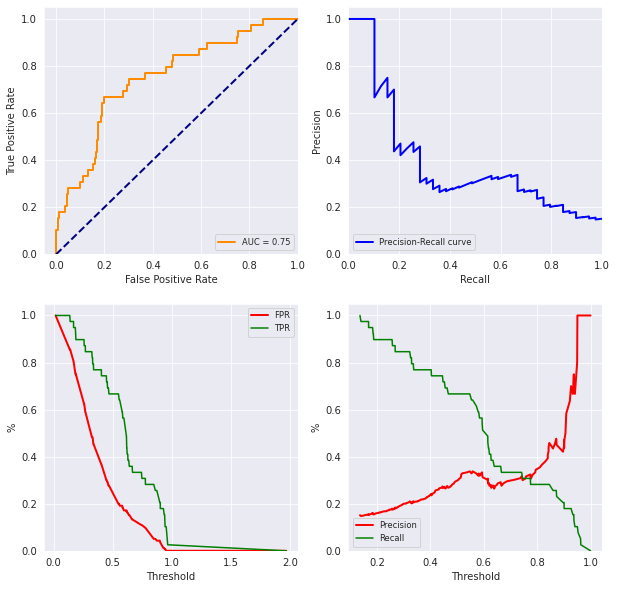

In [ ]:
df_metrics, df_roc_thresh, df_prc_thresh = binary_classification_metrics('logit', y_val, df_preds['y_pred'], df_preds['y_score'],print_out = False, plot_out = True)

In [ ]:
df_metrics

,logit
Accuracy,0.75
Precision,0.30
Recall,0.67
F1 Score,0.41
ROC AUC,0.75


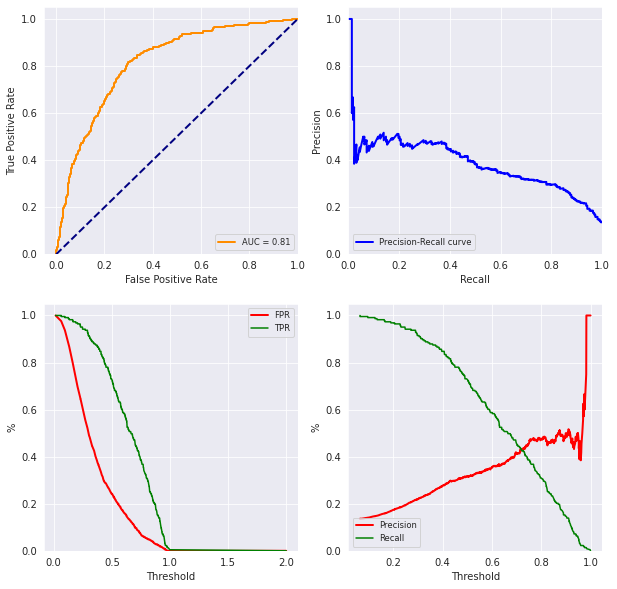

In [ ]:
# training set
train_pred = logit.predict(X_train)
train_prob = logit.predict_proba(X_train)[:,1]
df_metrics_train, _, _ = binary_classification_metrics('logit', y_train, train_pred, train_prob, print_out = False, plot_out = True)

In [ ]:
df_metrics_train

,logit
Accuracy,0.75
Precision,0.32
Recall,0.73
F1 Score,0.44
ROC AUC,0.81


* Training and validation results are similar, there is no overfitting.

### **After applying SMOTE**

In [ ]:
logit_smote = LogisticRegression(penalty = 'l2', random_state = 31)

In [ ]:
logit_smote, df_preds_smote = binary_clf('logit', logit_smote, X_train_smote, y_train_smote, X_val_smote)

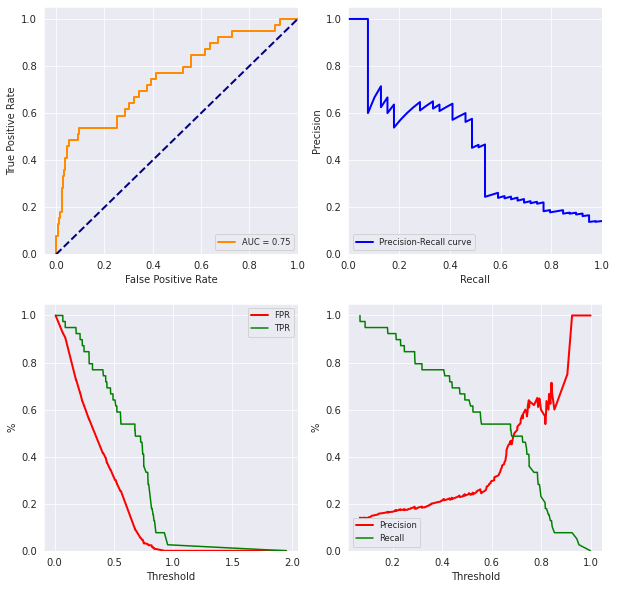

In [ ]:
df_metrics_smote, df_roc_thresh_smote, df_prc_thresh_smote = binary_classification_metrics('logit', y_val_smote, df_preds_smote['y_pred'], df_preds_smote['y_score'],
                                                                                            print_out = False, plot_out = True)

In [ ]:
df_metrics_smote

,logit
Accuracy,0.68
Precision,0.24
Recall,0.64
F1 Score,0.35
ROC AUC,0.75


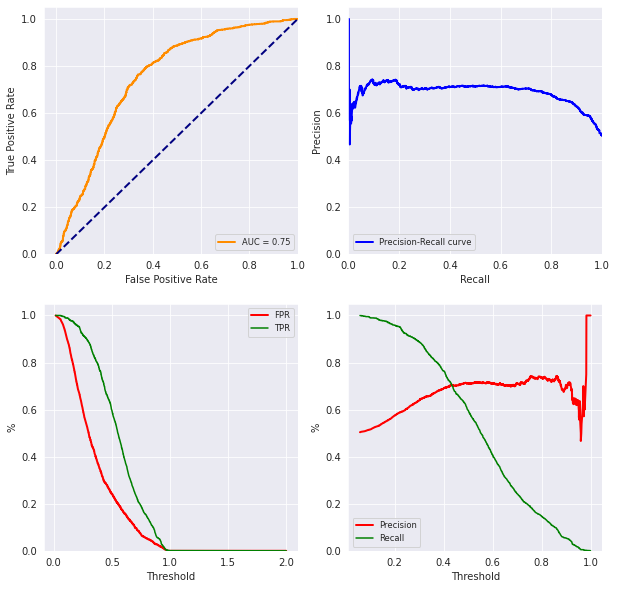

In [ ]:
# training set
train_pred = logit.predict(X_train_smote)
train_prob = logit.predict_proba(X_train_smote)[:,1]
df_metrics_train_smote, _, _ = binary_classification_metrics('logit', y_train_smote, train_pred, train_prob, print_out = False, plot_out = True)

In [ ]:
df_metrics_train_smote

,logit
Accuracy,0.68
Precision,0.71
Recall,0.60
F1 Score,0.65
ROC AUC,0.75


* In terms of precision-recall the model shows signs of overfitting when using smote.

* Comparing the metrics of two models we conclude that the model performs better without applying SMOTE.
* Now we proceed with data without smote to train more complex models and evaluate their performance.

# **Random Forest Model**

* Now we will implement Random Forest model

In [ ]:
RF = RandomForestClassifier(class_weight = weights_dict)

In [ ]:
rf, df_preds_rf = binary_clf('RF', RF, X_train, y_train, X_val)

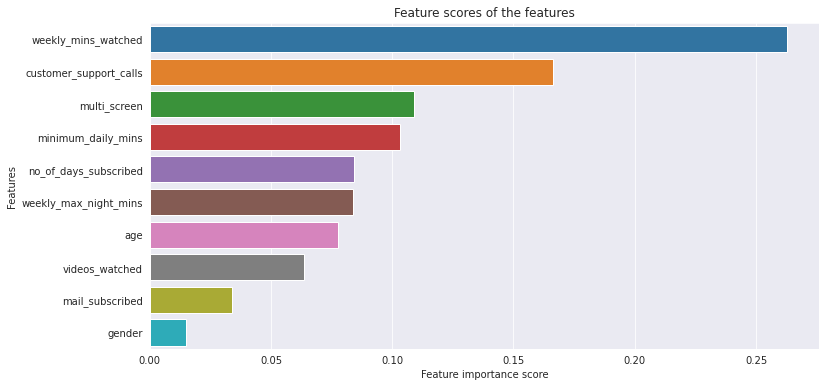

In [ ]:
# Feature importance
feat_scores = pd.Series(rf.feature_importances_, index = df_train.drop(columns = 'churn', axis = 1).columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=feat_scores.to_numpy(), y=feat_scores.index)
ax.set_title("Feature scores of the features")
ax.set_ylabel("Features")
ax.set_yticklabels(feat_scores.index)
ax.set_xlabel("Feature importance score")
#ax.tick_params(axis='x', labelrotation = 70)
plt.show();

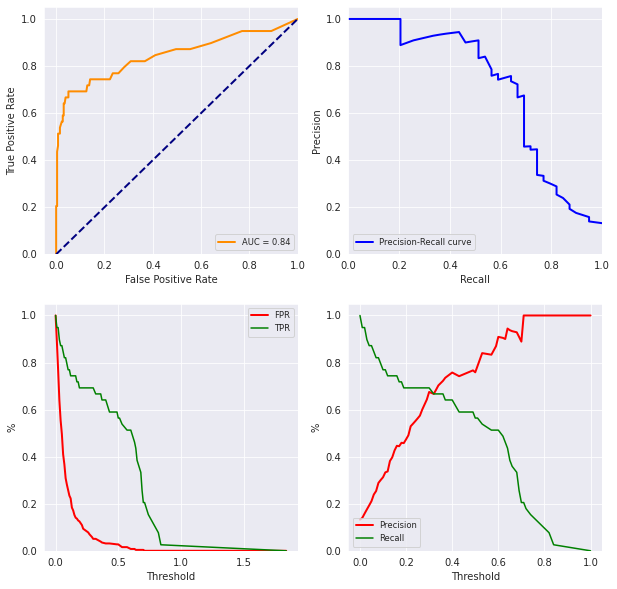

In [ ]:
df_metrics_rf, df_roc_thresh, df_prc_thresh = binary_classification_metrics('RF', y_val, df_preds_rf['y_pred'], df_preds_rf['y_score'],print_out = False, plot_out = True)

In [ ]:
df_metrics_rf

,RF
Accuracy,0.92
Precision,0.79
Recall,0.56
F1 Score,0.66
ROC AUC,0.84


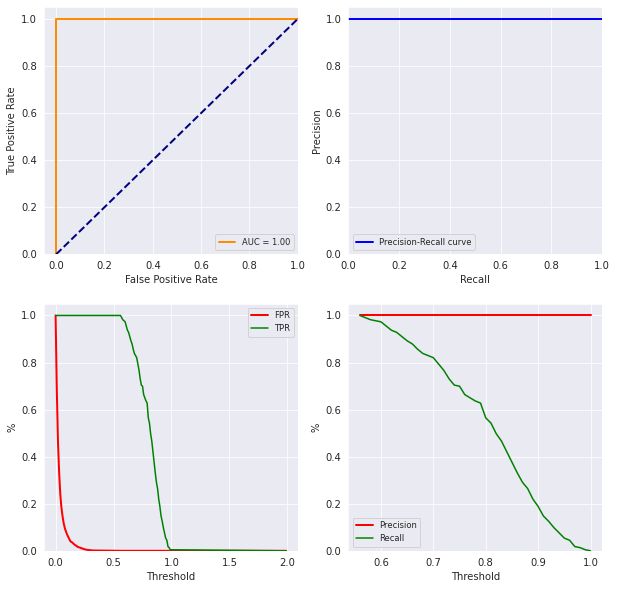

In [ ]:
# training set
train_pred = rf.predict(X_train)
train_prob = rf.predict_proba(X_train)[:,1]
df_metrics_train, _, _ = binary_classification_metrics('RF', y_train, train_pred, train_prob, print_out = False, plot_out = True)

* Since training error is significantly lower than testing error. the model has overfitted the data.

### **Hyperparameter tuning** using scikit-learn's **GridSearchCV**. 

Following are the hyperparameters of RF:

* n_estimators
* max_depth
* max_leaf_nodes
* min_samples_leaf
* min_sample_split
* max_sample (bootstrap sample)
* max_feature

In [ ]:
# dictionary of hyperparameters to pass to GridSearch
params_dict = {
    'n_estimators' : [200, 250, 300,500,700,1000],
    'max_depth' : [5,8,10,15],
    'min_samples_split' : [5, 8, 10],
    'min_samples_leaf' : [3,5,7]
}

In [ ]:
tuned_rf, df_preds_rf = binary_clf('RF', RF, X_train, y_train, X_val, params = params_dict, score = 'recall')

Performing hyperparameter tuning on the model - RF
Tuning complete !!


In [ ]:
tuned_rf

RandomForestClassifier(class_weight={0.0: 1.0, 1.0: 6.488789237668161},
                       max_depth=5, min_samples_leaf=7, min_samples_split=10,
                       n_estimators=500)

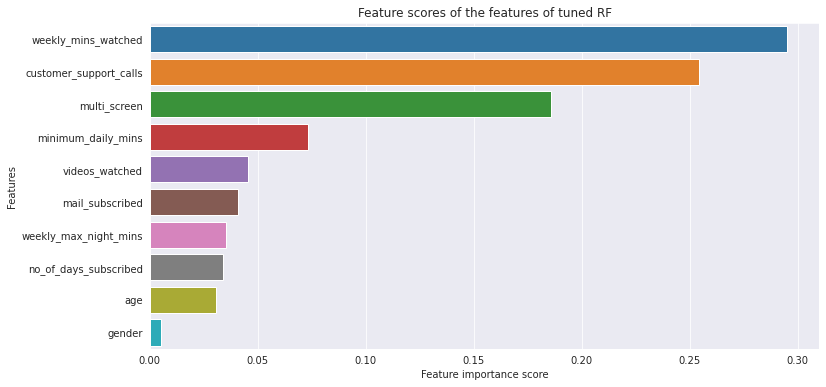

In [ ]:
# Feature importance
feat_scores = pd.Series(tuned_rf.feature_importances_, index = df_train.drop(columns = 'churn', axis = 1).columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=feat_scores.to_numpy(), y=feat_scores.index)
ax.set_title("Feature scores of the features of tuned RF")
ax.set_ylabel("Features")
ax.set_yticklabels(feat_scores.index)
ax.set_xlabel("Feature importance score")
#ax.tick_params(axis='x', labelrotation = 70)
plt.show();

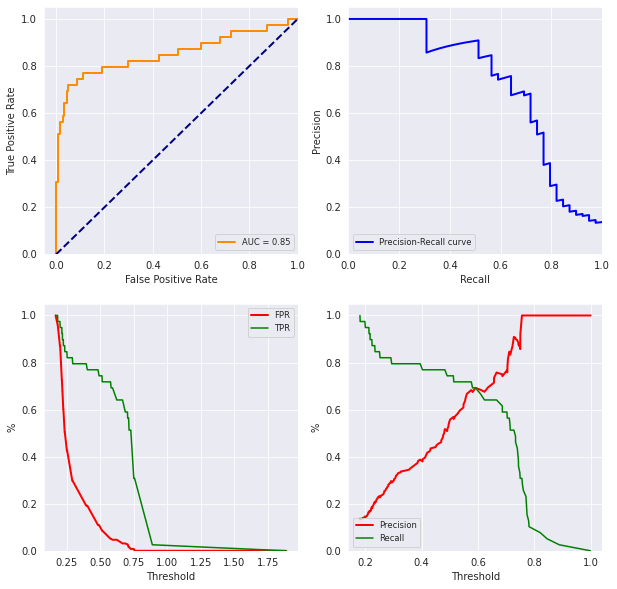

In [ ]:
df_metrics_rf, df_roc_thresh, df_prc_thresh = binary_classification_metrics('RF', y_val, df_preds_rf['y_pred'], df_preds_rf['y_score'],print_out = False, plot_out = True)

In [ ]:
df_metrics_rf

,RF
Accuracy,0.89
Precision,0.56
Recall,0.74
F1 Score,0.64
ROC AUC,0.85


# **XGboost**

In [ ]:
xgb = XGBClassifier(scale_pos_weight = weights_dict[1])

In [ ]:
xgb, df_preds_xgb = binary_clf('XGBoost', xgb, X_train, y_train, X_val)

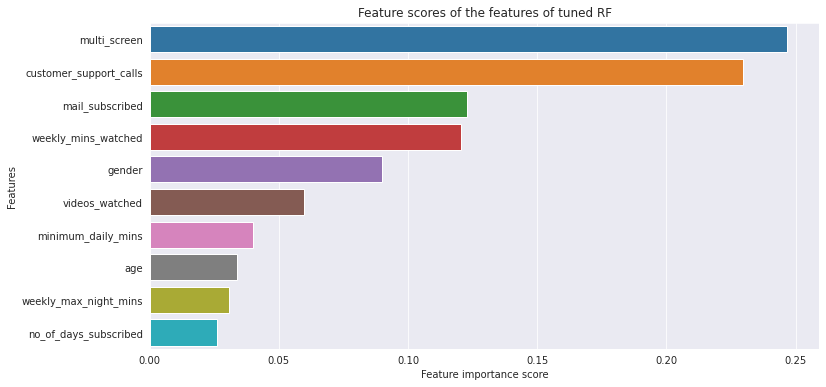

In [ ]:
# Feature importance
feat_scores = pd.Series(xgb.feature_importances_, index = df_train.drop(columns = 'churn', axis = 1).columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=feat_scores.to_numpy(), y=feat_scores.index)
ax.set_title("Feature scores of the features of tuned RF")
ax.set_ylabel("Features")
ax.set_yticklabels(feat_scores.index)
ax.set_xlabel("Feature importance score")
#ax.tick_params(axis='x', labelrotation = 70)
plt.show();

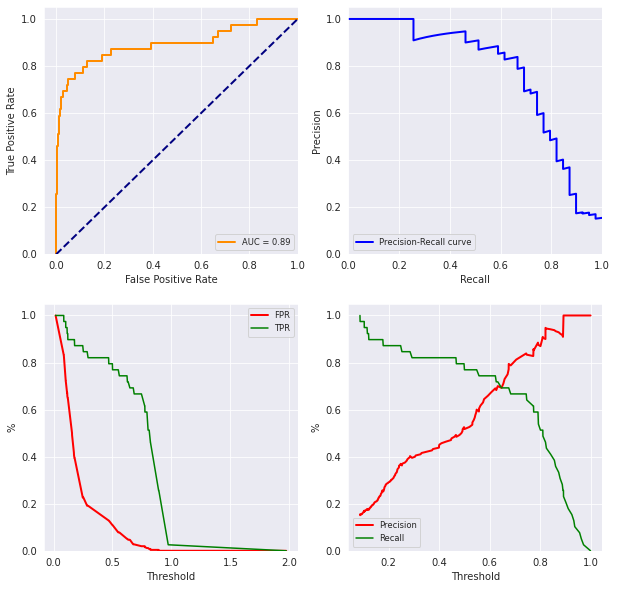

In [ ]:
df_metrics_xgb, df_roc_thresh, df_prc_thresh = binary_classification_metrics('XGBoost', y_val, df_preds_xgb['y_pred'], df_preds_xgb['y_score'],
                                                                              print_out = False, plot_out = True)

In [ ]:
df_metrics_xgb

,XGBoost
Accuracy,0.87
Precision,0.52
Recall,0.77
F1 Score,0.62
ROC AUC,0.89


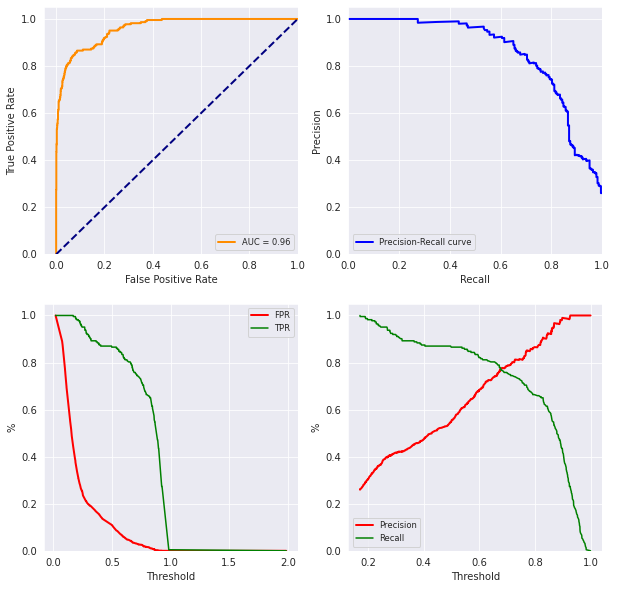

In [ ]:
# training set
train_pred = xgb.predict(X_train)
train_prob = xgb.predict_proba(X_train)[:,1]
df_metrics_train, _, _ = binary_classification_metrics('XGBoost', y_train, train_pred, train_prob, print_out = False, plot_out = True)

In [ ]:
df_metrics_train

,XGBoost
Accuracy,0.89
Precision,0.55
Recall,0.87
F1 Score,0.67
ROC AUC,0.96


### **Hyperparameter tuning** using scikit-learn's **GridSearchCV**. 


In [ ]:
params_dict = {
    'booster' : ['gblinear', 'gbtree'],
    'n_estimators' : [200, 250, 300, 500, 1000],
    'max_depth' : [3, 5, 8],
    'subsample' : [0.65, 0.75, 0.85],
    'colsample_bytree' : [0.6, 0.7]
}

In [ ]:
tuned_xgb, df_preds_xgb = binary_clf('XGBoost', xgb, X_train, y_train, X_val, params = params_dict, score = 'recall')

Performing hyperparameter tuning on the model - XGBoost
Tuning complete !!


In [ ]:
tuned_xgb

XGBClassifier(colsample_bytree=0.7, n_estimators=200,
              scale_pos_weight=6.488789237668161, subsample=0.65)

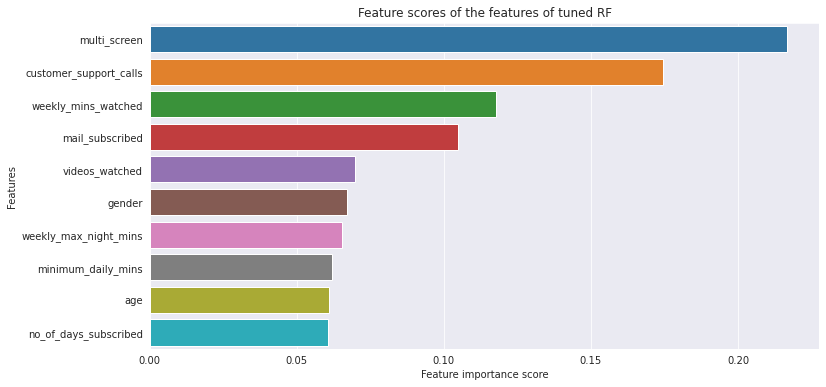

In [ ]:
# Feature importance
feat_scores = pd.Series(tuned_xgb.feature_importances_, index = df_train.drop(columns = 'churn', axis = 1).columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=feat_scores.to_numpy(), y=feat_scores.index)
ax.set_title("Feature scores of the features of tuned RF")
ax.set_ylabel("Features")
ax.set_yticklabels(feat_scores.index)
ax.set_xlabel("Feature importance score")
#ax.tick_params(axis='x', labelrotation = 70)
plt.show();

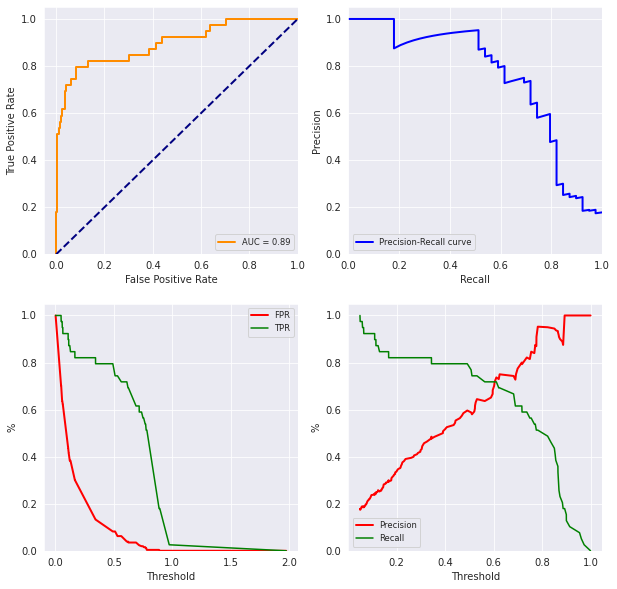

In [ ]:
df_metrics_xgb, df_roc_thresh, df_prc_thresh = binary_classification_metrics('XGBoost', y_val, df_preds_xgb['y_pred'], df_preds_xgb['y_score'],
                                                                              print_out = False, plot_out = True)

In [ ]:
df_metrics_xgb

,XGBoost
Accuracy,0.90
Precision,0.59
Recall,0.77
F1 Score,0.67
ROC AUC,0.89


# **Best Model**

We applied following SOTA ML algorithms to predict the customer churn

>* Logistic Regression
* Random Forest
* Gradient Boosting

* Our target was to mazimize the business metric 'Recall' as we want out model to correctly classify the customers who are going to churn.

* Among the three models, the best results were obtained from the Gradient Boosting classifier for the given dataset.


**Making predictions on the test data with the Gradient Boosting Classifier**

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    35 non-null     int64  
 1   customer_id             35 non-null     int64  
 2   phone_no                35 non-null     object 
 3   gender                  35 non-null     object 
 4   age                     35 non-null     int64  
 5   no_of_days_subscribed   35 non-null     int64  
 6   multi_screen            35 non-null     object 
 7   mail_subscribed         35 non-null     object 
 8   weekly_mins_watched     35 non-null     float64
 9   minimum_daily_mins      35 non-null     float64
 10  maximum_daily_mins      35 non-null     float64
 11  weekly_max_night_mins   35 non-null     int64  
 12  videos_watched          35 non-null     int64  
 13  maximum_days_inactive   33 non-null     float64
 14  customer_support_calls  35 non-null     int6

In [ ]:
cols_to_drop = ['year', 'customer_id', 'phone_no', 'maximum_daily_mins', 'maximum_days_inactive']
test_df_final = test_df.drop(columns = cols_to_drop, axis = 1)

In [ ]:
missing_check(test_df_final)

,Feature,Count of missing_values,Percentage of Total
0,gender,0,0.00
1,age,0,0.00
2,no_of_days_subscribed,0,0.00
3,multi_screen,0,0.00
4,mail_subscribed,0,0.00
5,weekly_mins_watched,0,0.00
6,minimum_daily_mins,0,0.00
7,weekly_max_night_mins,0,0.00
8,videos_watched,0,0.00
9,customer_support_calls,0,0.00


In [ ]:
test_df_final['gender'] = test_df_final['gender'].map({'Female': 0, 'Male': 1})
test_df_final['multi_screen'] = test_df_final['multi_screen'].map({'no': 0, 'yes': 1})
test_df_final['mail_subscribed'] = test_df_final['mail_subscribed'].map({'no': 0, 'yes': 1})

In [ ]:
test_arr = scaler.transform(test_df_final.to_numpy())
test_arr

array([[0.        , 0.28125   , 0.39393939, 0.        , 1.        ,
        0.53056517, 0.635     , 0.40601504, 0.16666667, 0.22222222],
       [0.        , 0.328125  , 0.44155844, 0.        , 0.        ,
        0.46193772, 0.485     , 0.41353383, 0.11111111, 0.        ],
       [1.        , 0.21875   , 0.28138528, 0.        , 1.        ,
        0.50374856, 0.445     , 0.42105263, 0.11111111, 0.11111111],
       [1.        , 0.296875  , 0.37229437, 0.        , 0.        ,
        0.45213379, 0.38      , 0.26315789, 0.33333333, 0.11111111],
       [0.        , 0.296875  , 0.42424242, 0.        , 0.        ,
        0.33304498, 0.575     , 0.42105263, 0.38888889, 0.77777778],
       [0.        , 0.15625   , 0.54978355, 0.        , 0.        ,
        0.68598616, 0.695     , 0.19548872, 0.22222222, 0.11111111],
       [1.        , 0.203125  , 0.64935065, 1.        , 0.        ,
        0.62860438, 0.62      , 0.39849624, 0.05555556, 0.        ],
       [1.        , 0.34375   , 0.4502164

In [ ]:
# predictions with tuned xgboost
test_preds = tuned_xgb.predict(test_arr)
test_preds_prob = tuned_xgb.predict_proba(test_arr)[:,1]

test_df['churn_probability'] = test_preds_prob
test_df['churn'] = test_preds

In [ ]:
test_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn_probability,churn
0,2015,129137,335-7257,Female,36,92,no,yes,276.00,12.70,31.28,96,3,NaN,2,0.04,0.00
1,2015,129487,377-9178,Female,39,103,no,no,240.30,9.70,27.23,97,2,NaN,0,0.16,0.00
2,2015,148624,410-5713,Male,32,66,no,yes,262.05,8.90,29.70,98,2,3.00,1,0.12,0.00
3,2015,148676,370-7546,Male,37,87,no,no,235.20,7.60,26.66,77,6,3.00,1,0.09,0.00
4,2015,165361,380-8727,Female,37,99,no,no,173.25,11.50,19.64,98,7,4.00,7,0.86,1.00
5,2015,165883,358-9095,Female,28,128,no,no,356.85,13.90,40.44,68,4,4.00,1,0.15,0.00
6,2015,184762,357-1909,Male,31,151,yes,no,327.00,12.40,37.06,95,1,4.00,0,0.59,1.00
7,2015,184815,397-7500,Male,40,105,no,yes,211.80,11.40,24.00,101,2,4.00,1,0.07,0.00
8,2015,200466,374-1551,Male,38,80,no,no,177.15,8.20,20.08,86,6,3.00,1,0.05,0.00
9,2015,230769,366-7247,Male,60,93,yes,no,325.35,17.50,36.87,110,5,5.00,1,0.90,1.00


In [ ]:
# Save the final data frame to a csv file
test_df.to_csv('churn_predictions.csv')